# 1. Install Dependencies and Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!unzip "/content/drive/MyDrive/paper 3 siham/data/data1_oep.zip" -d "/content/drive/MyDrive/paper 3 siham/data"

In [ ]:
cd /content/drive/MyDrive/paper 3 siham/data/data1_oep


/content/drive/MyDrive/paper 3 siham/data/data1_oep


In [ ]:
!pwd

/content/drive/MyDrive/paper 3 siham/data/data1_oep


In [ ]:
import tensorflow as tf
import os

# 2. Remove dodgy images

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = '/content/drive/MyDrive/paper 3 siham/data/data1_oep'

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/paper 3 siham/data/data1_oep')

Found 11581 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

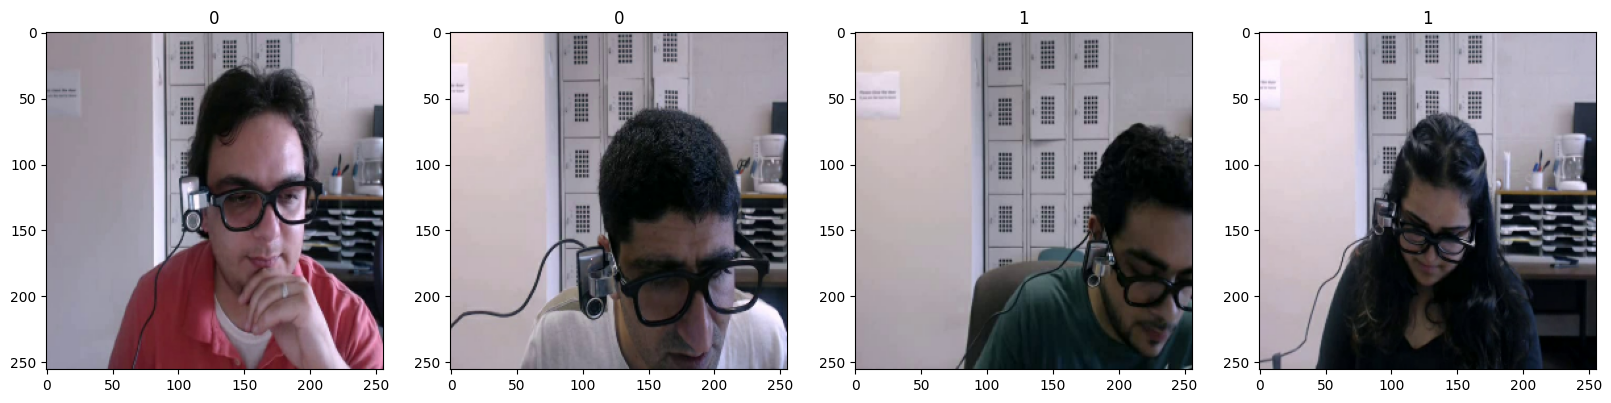

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.58431375, 0.5411765 , 0.57254905],
          [0.58431375, 0.5411765 , 0.57254905],
          [0.58431375, 0.5411765 , 0.57254905],
          ...,
          [0.74338233, 0.7120098 , 0.7629902 ],
          [0.74509805, 0.7137255 , 0.7647059 ],
          [0.7428309 , 0.7114583 , 0.7624387 ]],
 
         [[0.58431375, 0.5411765 , 0.57254905],
          [0.58431375, 0.5411765 , 0.57254905],
          [0.58431375, 0.5411765 , 0.57254905],
          ...,
          [0.74240196, 0.7110294 , 0.7620098 ],
          [0.74509805, 0.7137255 , 0.7647059 ],
          [0.74509805, 0.7137255 , 0.7647059 ]],
 
         [[0.5803922 , 0.5411765 , 0.57254905],
          [0.5803922 , 0.5411765 , 0.57254905],
          [0.5803922 , 0.5411765 , 0.57254905],
          ...,
          [0.7466299 , 0.71525735, 0.76623774],
          [0.7490196 , 0.7176471 , 0.76862746],
          [0.7490196 , 0.7176471 , 0.76862746]],
 
         ...,
 
         [[0.58406866, 0.5801471 , 0.61151963],
          [0.58976

# 5. Split Data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

253

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32,kernel_size=(2,2),activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer= tf.keras.optimizers.RMSprop(), loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 255, 255, 32)      416       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 126, 126, 64)      8256      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 62, 62, 128)       32896     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 31, 31, 128)      

# 7. Train

In [ ]:
logdir='logs'

In [ ]:
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
from tensorflow.keras import callbacks

CALLBACKS = [
    callbacks.EarlyStopping(monitor='loss', min_delta=0.01, patience=7, verbose=1),
    callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, min_delta=0.01, min_lr=1e-10, patience=2, verbose=1, mode='auto')
]

In [ ]:
import time
t1=time.time()
hist = model.fit(train, epochs=60, validation_data=val, callbacks=CALLBACKS)
t2= time.time()
temps_execution = t2 - t1
print(f"Le temps d'exécution est de {temps_execution} secondes.")

Epoch 1/60
253/253 [==============================] - 72s 277ms/step - loss: 0.5894 - accuracy: 0.7194 - val_loss: 0.4294 - val_accuracy: 0.7930 - lr: 0.0010
Epoch 2/60
253/253 [==============================] - 70s 275ms/step - loss: 0.3627 - accuracy: 0.8393 - val_loss: 0.2984 - val_accuracy: 0.8754 - lr: 0.0010
Epoch 3/60
253/253 [==============================] - 70s 273ms/step - loss: 0.2871 - accuracy: 0.8781 - val_loss: 0.2559 - val_accuracy: 0.8893 - lr: 0.0010
Epoch 4/60
253/253 [==============================] - 69s 271ms/step - loss: 0.2322 - accuracy: 0.9039 - val_loss: 0.2172 - val_accuracy: 0.9141 - lr: 0.0010
Epoch 5/60
253/253 [==============================] - 70s 273ms/step - loss: 0.1994 - accuracy: 0.9208 - val_loss: 0.2255 - val_accuracy: 0.9119 - lr: 0.0010
Epoch 6/60
253/253 [==============================] - 74s 291ms/step - loss: 0.1717 - accuracy: 0.9347 - val_loss: 0.2708 - val_accuracy: 0.9006 - lr: 0.0010
Epoch 7/60
253/253 [==============================] 

# 8. Plot Performance

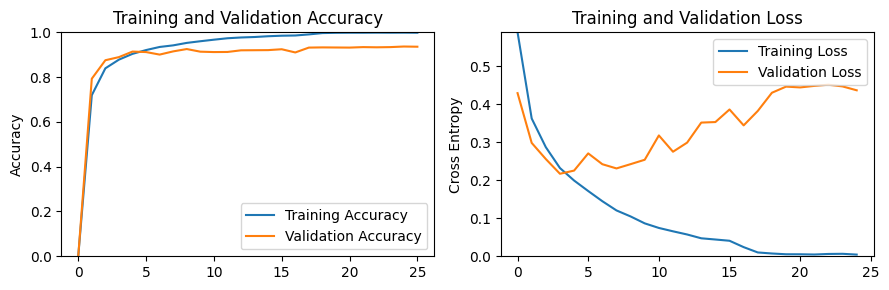

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' contains your training history

acc = [0.] + hist.history['accuracy']
val_acc = [0.] + hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Create a figure with two subplots in the same row
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))

# Plot accuracy
ax1.plot(acc, label='Training Accuracy')
ax1.plot(val_acc, label='Validation Accuracy')
ax1.legend(loc='lower right')
ax1.set_ylabel('Accuracy')
ax1.set_ylim([min(min(acc), min(val_acc)), 1])
ax1.set_title('Training and Validation Accuracy')

# Plot loss
ax2.plot(loss, label='Training Loss')
ax2.plot(val_loss, label='Validation Loss')
ax2.legend(loc='upper right')
ax2.set_ylabel('Cross Entropy')
ax2.set_ylim([0, max(max(loss), max(val_loss))])
ax2.set_title('Training and Validation Loss')

plt.tight_layout()
plt.show()

# 9. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
model.evaluate(train)

253/253 [==============================] - 28s 106ms/step - loss: 0.0026 - accuracy: 0.9994


[0.002595748519524932, 0.9993824362754822]

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 29ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9253012, shape=(), dtype=float32) tf.Tensor(0.87871855, shape=(), dtype=float32) tf.Tensor(0.9270833, shape=(), dtype=float32)


In [ ]:
t3=time.time()
model.evaluate(test)
t4= time.time()
temps_execution = t4 - t3
print(f"Le temps d'exécution est de {temps_execution} secondes.")

36/36 [==============================] - 33s 97ms/step - loss: 0.4310 - accuracy: 0.9340
Le temps d'exécution est de 40.96536469459534 secondes.


In [ ]:
model.evaluate(val)

72/72 [==============================] - 30s 101ms/step - loss: 0.4643 - accuracy: 0.9336


[0.46434837579727173, 0.93359375]

In [ ]:
y_pred = []  # store predicted labels
y_true = []  # store true labels
y_pred1 = []
# iterate over the dataset
for image_batch, label_batch in test:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds= model.predict(image_batch)
   # append predicted labels
   # y_pred.append(np.argmax(preds, axis = - 1))
   #y_pred.append( preds.argmax(axis = 1))
   #y_pred=rech(preds)
   y_pred=np.where(preds> 0.5, 1,0)
   y_pred1.append(y_pred)
# convert the true and predicted labels into tensors
yr= tf.concat([item for item in y_true], axis = 0)
yp = tf.concat([item for item in y_pred1], axis = 0)

1/1 [==============================] - 0s 31ms/step


In [ ]:
#yr

In [ ]:
#yp

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report = classification_report(yr,yp)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       705
           1       0.94      0.89      0.91       447

    accuracy                           0.93      1152
   macro avg       0.93      0.92      0.93      1152
weighted avg       0.93      0.93      0.93      1152



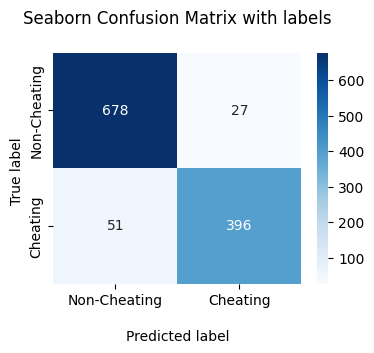

In [ ]:
from sklearn.metrics import confusion_matrix
# importing library for plotting
import matplotlib.pyplot as plt
# plot the confusion matrix
f,ax = plt.subplots(figsize=(4,3))
#Generate the confusion matrix
cf_matrix = confusion_matrix(yr, yp)
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap=plt.cm.Blues, fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted label')
ax.set_ylabel('True label ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Cheating','Cheating'])
ax.yaxis.set_ticklabels(['Non-Cheating','Cheating'])

## Display the visualization of the Confusion Matrix.
plt.show()

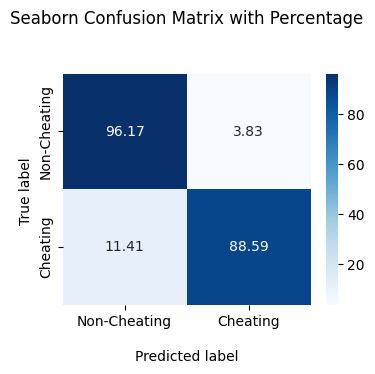

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(figsize=(4,3))
# Generate the confusion matrix
cf_matrix = confusion_matrix(yr, yp)

# Calculate the percentages
cf_matrix_percent = cf_matrix / cf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Create the heatmap
ax = sns.heatmap(cf_matrix_percent, annot=True, cmap=plt.cm.Blues, fmt='.2f')

# Set the title and labels
ax.set_title('Seaborn Confusion Matrix with Percentage\n\n')
ax.set_xlabel('\nPredicted label')
ax.set_ylabel('True label ')

# Set tick labels
ax.xaxis.set_ticklabels(['Non-Cheating', 'Cheating'])
ax.yaxis.set_ticklabels(['Non-Cheating', 'Cheating'])

# Display the visualization of the Confusion Matrix with percentage
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import det_curve
fpr, fnr, thresholds = det_curve(yr, yp)
print(fpr)

[1.         0.03829787]


In [ ]:
import numpy as np
from sklearn.metrics import f1_score

print('f1_score=',f1_score(yr, yp, average='macro'))

f1_score= 0.9279757610734383


# 10. Test

In [ ]:
import cv2

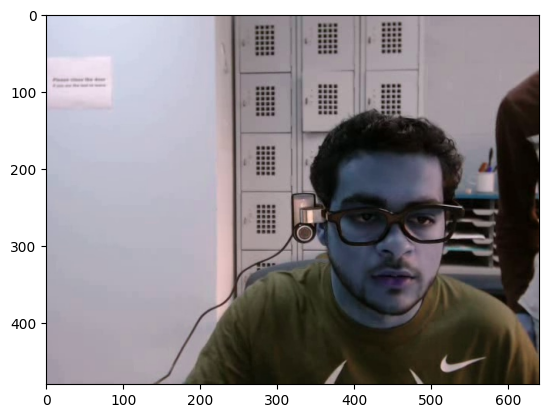

In [ ]:
img = cv2.imread('/content/drive/MyDrive/paper 3 siham/data/data1_oep/2.cheating/alhashe31frame450.jpg')
plt.imshow(img)
plt.show()


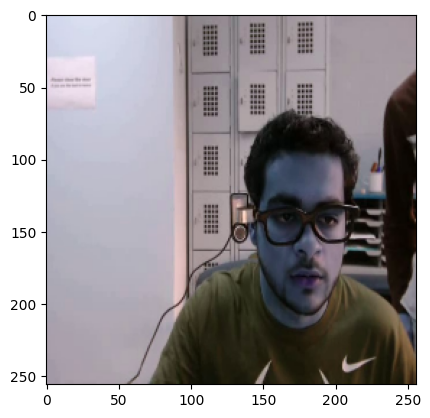

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 174ms/step


In [ ]:
yhat

array([[1.]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is cheating')
else:
    print(f'Predicted class is no cheating')

Predicted class is cheating


# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
#model.save(os.path.join('  /content/drive/MyDrive/paper 3 siham/data/models','1.data1_cnn_f.h5'))
model.save(os.path.join('/content/drive/MyDrive/paper 3 siham/data/models','1.data1_cnn_f.h5'))


In [ ]:
new_model = load_model('/content/drive/MyDrive/paper 3 siham/data/models/1.data1_cnn_f.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 75ms/step


array([[1.]], dtype=float32)